# Problem 1: Odroid MC1 Benchmark Measurements


## Overview
- **Question 1 [12p]**: Run TPBench on core 4, measure power, temperature, and usage
- **Question 2 [3p]**: Identify benchmark phases from temperature data
- **Question 3 [15p]**: Run blackscholes and bodytrack benchmarks, create plots and fill Table 1



In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

---
## Question 1: TPBench Measurement [12p]

**Task**: 
- Set LITTLE cluster to 0.2GHz, big cluster to 2GHz
- Run TPBench on core 4 (first big core)
- Create 3 plots: system power, big cores temperature, big cores usage



In [31]:
# Load and plot the data (Run locally after transferring the log file)

# Load the data
try:
    data_q1 = pd.read_csv('q1_tpbench_log.txt', sep='\t')
    print("Data loaded successfully!")
    print(f"Shape: {data_q1.shape}")
    print(f"\nFirst few rows:")
    print(data_q1.head())
except FileNotFoundError:
    print("Error: q1_tpbench_log.txt not found!")
    print("Please transfer the log file from the Odroid first.")
    data_q1 = None

Data loaded successfully!
Shape: (557, 14)

First few rows:
    time  power_W  usage_c0  usage_c1  usage_c2  usage_c3  usage_c4  usage_c5  \
0  0.000    0.000     0.098     0.000       0.0     0.000     0.024       0.0   
1  0.204    0.000     0.000     0.000       0.0     0.000     0.895       0.0   
2  0.406    0.000     0.050     0.000       0.0     0.048     1.000       0.0   
3  0.608    0.000     0.050     0.000       0.0     0.000     1.000       0.0   
4  0.810    5.122     0.050     0.048       0.0     0.000     1.000       0.0   

   usage_c6  usage_c7  temp4  temp5  temp6  temp7  
0     0.000       0.0   32.0   32.0   36.0   33.0  
1     0.048       0.0   44.0   34.0   37.0   34.0  
2     0.000       0.0   46.0   36.0   38.0   36.0  
3     0.000       0.0   47.0   37.0   39.0   36.0  
4     0.000       0.0   48.0   38.0   40.0   37.0  


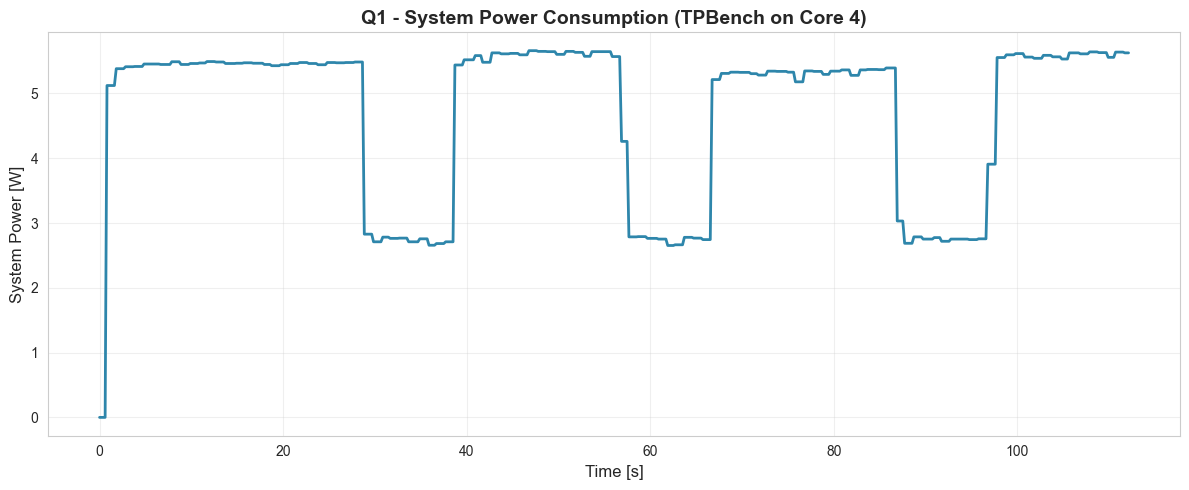

Plot saved as: q1_plot1_power.png


In [32]:
# Plot 1: System Power Consumption
if data_q1 is not None:
    plt.figure(figsize=(12, 5))
    plt.plot(data_q1['time'], data_q1['power_W'], linewidth=2, color='#2E86AB')
    plt.xlabel('Time [s]', fontsize=12)
    plt.ylabel('System Power [W]', fontsize=12)
    plt.title('Q1 - System Power Consumption (TPBench on Core 4)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('q1_plot1_power.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as: q1_plot1_power.png")

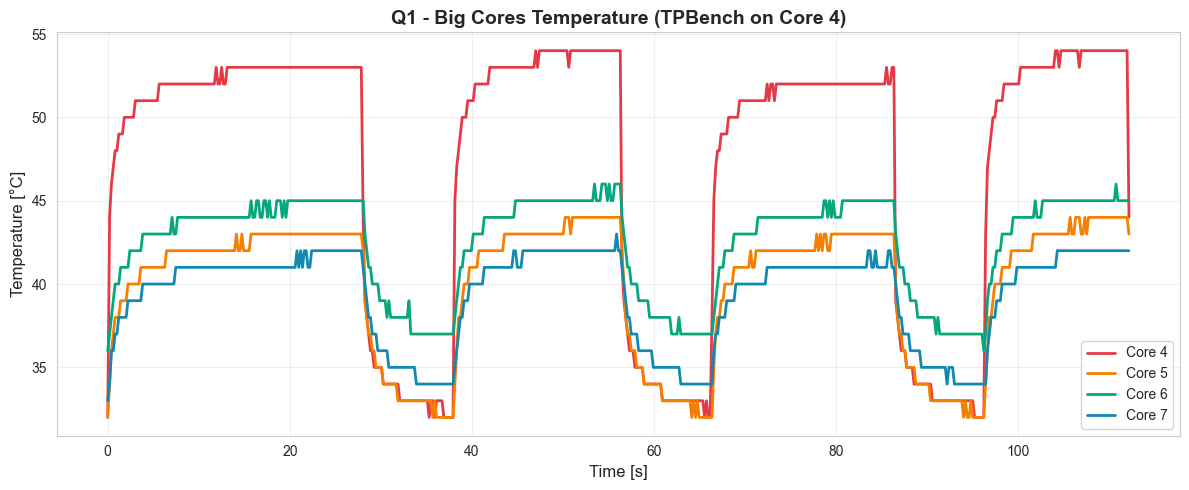

Plot saved as: q1_plot2_temperature.png


In [33]:
# Plot 2: Big Cores Temperature (one curve per core)
if data_q1 is not None:
    plt.figure(figsize=(12, 5))
    colors = ['#E63946', '#F77F00', '#06A77D', '#118AB2']
    
    plt.plot(data_q1['time'], data_q1['temp4'], linewidth=2, color=colors[0], label='Core 4')
    plt.plot(data_q1['time'], data_q1['temp5'], linewidth=2, color=colors[1], label='Core 5')
    plt.plot(data_q1['time'], data_q1['temp6'], linewidth=2, color=colors[2], label='Core 6')
    plt.plot(data_q1['time'], data_q1['temp7'], linewidth=2, color=colors[3], label='Core 7')
    
    plt.xlabel('Time [s]', fontsize=12)
    plt.ylabel('Temperature [°C]', fontsize=12)
    plt.title('Q1 - Big Cores Temperature (TPBench on Core 4)', fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('q1_plot2_temperature.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as: q1_plot2_temperature.png")

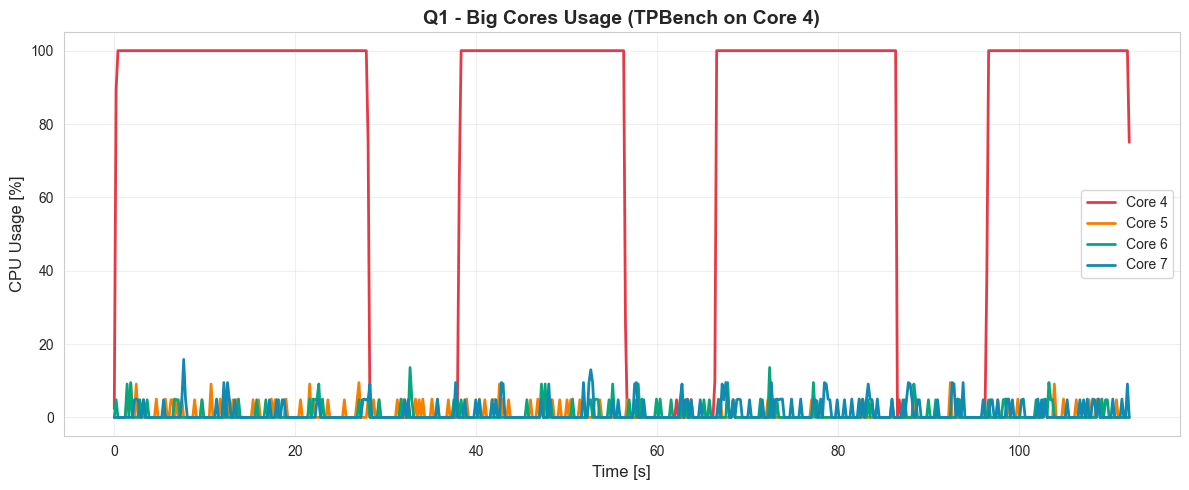

Plot saved as: q1_plot3_usage.png


In [34]:
# Plot 3: Big Cores Usage (one curve per core)
if data_q1 is not None:
    plt.figure(figsize=(12, 5))
    colors = ['#E63946', '#F77F00', '#06A77D', '#118AB2']
    
    # Convert usage from [0,1] to percentage [0,100]
    plt.plot(data_q1['time'], data_q1['usage_c4']*100, linewidth=2, color=colors[0], label='Core 4')
    plt.plot(data_q1['time'], data_q1['usage_c5']*100, linewidth=2, color=colors[1], label='Core 5')
    plt.plot(data_q1['time'], data_q1['usage_c6']*100, linewidth=2, color=colors[2], label='Core 6')
    plt.plot(data_q1['time'], data_q1['usage_c7']*100, linewidth=2, color=colors[3], label='Core 7')
    
    plt.xlabel('Time [s]', fontsize=12)
    plt.ylabel('CPU Usage [%]', fontsize=12)
    plt.title('Q1 - Big Cores Usage (TPBench on Core 4)', fontsize=14, fontweight='bold')
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.ylim(-5, 105)
    plt.tight_layout()
    plt.savefig('q1_plot3_usage.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as: q1_plot3_usage.png")

---
## Question 2: Benchmark Phase Identification [3p]

**Question**: How many phases of benchmark execution can you identify based on the temperature variation in the plot? A phase is a significant increase in the temperature over an extended period of time.

**Answer**: Based on the temperature variation in the TPBench temperature plot, 4 distinct phases can be identified. 

---
## Question 3: Blackscholes and Bodytrack Benchmarks [15p]

**Task**:
- Run blackscholes and bodytrack on all 4 big cores (4 threads each)
- big cluster at 2GHz, LITTLE at 0.2GHz
- Create 4 plots total (2 per benchmark): system power and max big temp
- Fill in Table 1 with metrics


In [35]:
# Load the benchmark data
try:
    data_blackscholes = pd.read_csv('q3_blackscholes_log.txt', sep='\t')
    print("Blackscholes data loaded!")
    print(f"Shape: {data_blackscholes.shape}")
except FileNotFoundError:
    print("Warning: q3_blackscholes_log.txt not found!")
    data_blackscholes = None

try:
    data_bodytrack = pd.read_csv('q3_bodytrack_log.txt', sep='\t')
    print("Bodytrack data loaded!")
    print(f"Shape: {data_bodytrack.shape}")
except FileNotFoundError:
    print("Warning: q3_bodytrack_log.txt not found!")
    data_bodytrack = None

Blackscholes data loaded!
Shape: (661, 7)
Bodytrack data loaded!
Shape: (726, 7)


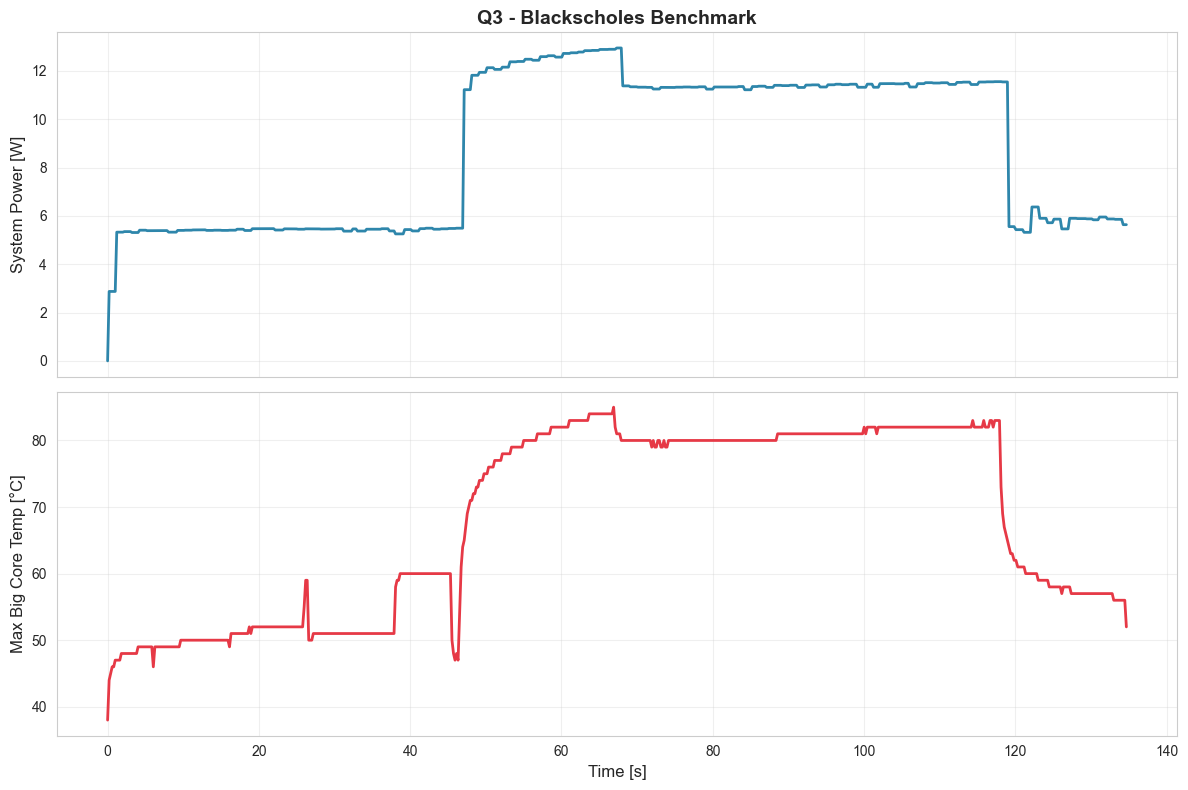

Plot saved as: q3_blackscholes_plots.png


In [36]:
# Plot blackscholes benchmark
if data_blackscholes is not None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # System power
    ax1.plot(data_blackscholes['time'], data_blackscholes['power_W'], 
             linewidth=2, color='#2E86AB')
    ax1.set_ylabel('System Power [W]', fontsize=12)
    ax1.set_title('Q3 - Blackscholes Benchmark', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Max big temp
    ax2.plot(data_blackscholes['time'], data_blackscholes['max_temp'], 
             linewidth=2, color='#E63946')
    ax2.set_xlabel('Time [s]', fontsize=12)
    ax2.set_ylabel('Max Big Core Temp [°C]', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('q3_blackscholes_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as: q3_blackscholes_plots.png")

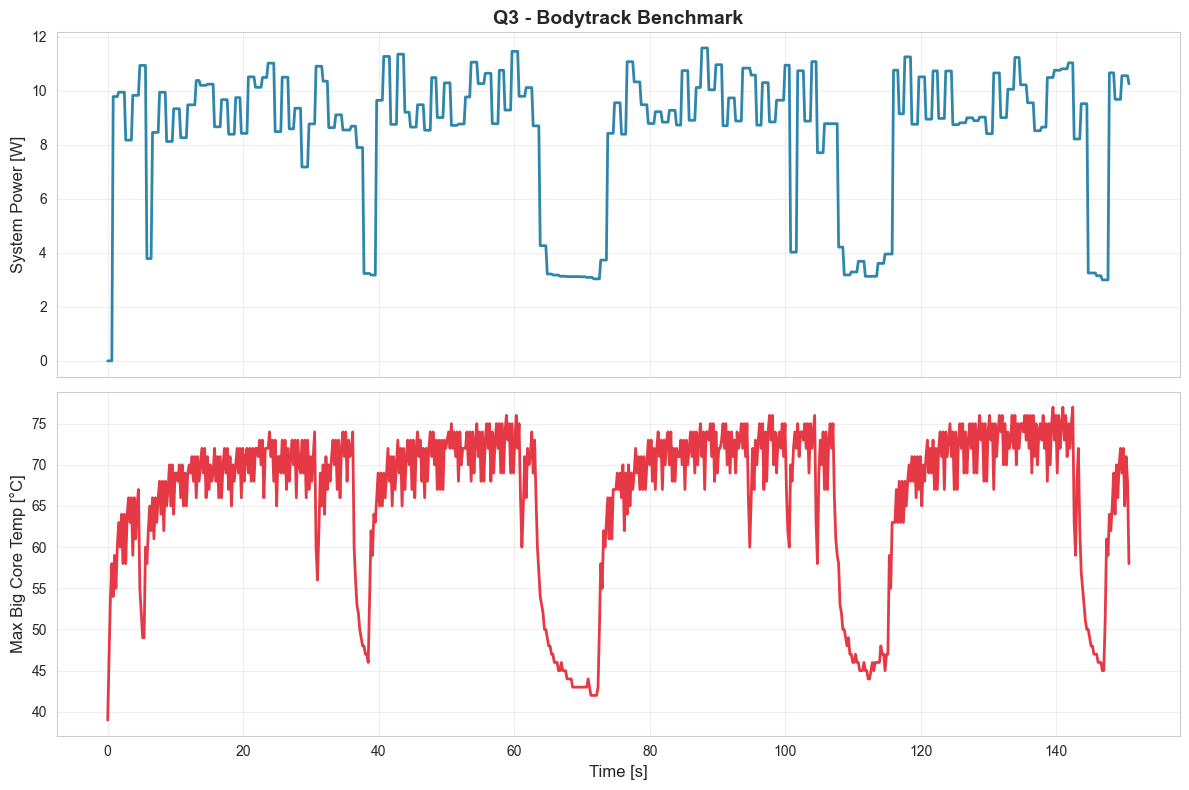

Plot saved as: q3_bodytrack_plots.png


In [37]:
# Plot bodytrack benchmark
if data_bodytrack is not None:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # System power
    ax1.plot(data_bodytrack['time'], data_bodytrack['power_W'], 
             linewidth=2, color='#2E86AB')
    ax1.set_ylabel('System Power [W]', fontsize=12)
    ax1.set_title('Q3 - Bodytrack Benchmark', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Max big temp
    ax2.plot(data_bodytrack['time'], data_bodytrack['max_temp'], 
             linewidth=2, color='#E63946')
    ax2.set_xlabel('Time [s]', fontsize=12)
    ax2.set_ylabel('Max Big Core Temp [°C]', fontsize=12)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('q3_bodytrack_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Plot saved as: q3_bodytrack_plots.png")

### Table 1: Benchmark Metrics

Calculate all required metrics for both benchmarks.

In [38]:
# Calculate Table 1 metrics
def calculate_metrics(data, benchmark_name):
    """Calculate all metrics for Table 1"""
    if data is None:
        print(f"{benchmark_name}: Data not available")
        return None
    
    # Run time: last timestamp
    run_time = data['time'].iloc[-1]
    
    # Average power
    avg_power = data['power_W'].mean()
    
    # Average max temp
    avg_max_temp = data['max_temp'].mean()
    
    # Max temp (peak temperature reached)
    max_temp = data['max_temp'].max()
    
    # Energy = avg_power × runtime
    energy = avg_power * run_time
    
    return {
        'Benchmark': benchmark_name,
        'Run time [s]': run_time,
        'Avg. power [W]': avg_power,
        'Avg. max temp [°C]': avg_max_temp,
        'Max temp [°C]': max_temp,
        'Energy [J]': energy
    }

# Calculate for both benchmarks
metrics_blackscholes = calculate_metrics(data_blackscholes, 'blackscholes')
metrics_bodytrack = calculate_metrics(data_bodytrack, 'bodytrack')

# Create DataFrame for nice display
if metrics_blackscholes and metrics_bodytrack:
    table_data = pd.DataFrame([metrics_blackscholes, metrics_bodytrack])
    table_data = table_data.set_index('Benchmark')
    
    print("\n" + "="*80)
    print("TABLE 1: BENCHMARK METRICS")
    print("="*80)
    print(table_data.to_string(float_format=lambda x: f'{x:.2f}'))
    print("="*80)
    
    # Also save to CSV for easy copying
    table_data.to_csv('q3_table1_metrics.csv')
    print("\nTable saved to: q3_table1_metrics.csv")
else:
    print("Cannot generate table - missing data files")


TABLE 1: BENCHMARK METRICS
              Run time [s]  Avg. power [W]  Avg. max temp [°C]  Max temp [°C]  Energy [J]
Benchmark                                                                                
blackscholes        134.68            8.78               67.78          85.00     1182.92
bodytrack           150.71            8.52               66.22          77.00     1284.08

Table saved to: q3_table1_metrics.csv
